In [ ]:
#!pip install yfinance pandas

## Obtaining data

In [203]:
import yfinance as yf
pd.set_option('display.float_format', lambda x: '%.15f' % x)

msft = yf.Ticker("ITSA4.SA")
df = msft.history(period='max').reset_index()
df.Date = df.Date.astype('string')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03,0.522889102924642,0.587201617581542,0.520093106432979,0.556443631649017,10799362,0.000000000000000,0.000000000000000
1,2000-01-04,0.536869936268198,0.536869936268198,0.503315448760986,0.503315448760986,12675326,0.000000000000000,0.000000000000000
2,2000-01-05,0.506112007169354,0.545258522033691,0.486538492654789,0.545258522033691,9621184,0.000000000000000,0.000000000000000
3,2000-01-06,0.542462366947944,0.556443404155393,0.539665889570002,0.553646862506866,24240133,0.000000000000000,0.000000000000000
4,2000-01-07,0.559239396339364,0.567627864848986,0.545258422678233,0.550850927829742,11776899,0.000000000000000,0.000000000000000
...,...,...,...,...,...,...,...,...
5522,2021-12-22,8.930000305175781,8.979999542236328,8.850000381469727,8.970000267028809,15136000,0.000000000000000,0.000000000000000
5523,2021-12-23,8.979999542236328,9.020000457763672,8.909999847412109,8.989999771118164,12063100,0.000000000000000,0.000000000000000
5524,2021-12-27,9.000000000000000,9.090000152587891,8.960000038146973,9.090000152587891,15350300,0.000000000000000,0.000000000000000
5525,2021-12-28,9.090000152587891,9.149999618530273,9.029999732971191,9.060000419616699,10173100,0.000000000000000,0.000000000000000


In [205]:
## Run this only if you don't have historical data
# df.to_csv('itsa4.csv', index=False)

historical_df = pd.read_csv('itsa4.csv')

In [206]:
known_dates = historical_df.Date
new_dates = df.Date

In [207]:
df = df[~new_dates.isin(known_dates)]

In [208]:
final_df = pd.concat([historical_df, df])
final_df.to_csv('itsa4.csv', index=False)

In [209]:
final_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03,0.522889102924642,0.587201617581542,0.520093106432979,0.556443631649017,10799362,0.000000000000000,0.000000000000000
1,2000-01-04,0.536869936268198,0.536869936268198,0.503315448760986,0.503315448760986,12675326,0.000000000000000,0.000000000000000
2,2000-01-05,0.506112007169354,0.545258522033691,0.486538492654789,0.545258522033691,9621184,0.000000000000000,0.000000000000000
3,2000-01-06,0.542462366947944,0.556443404155393,0.539665889570002,0.553646862506866,24240133,0.000000000000000,0.000000000000000
4,2000-01-07,0.559239396339364,0.567627864848986,0.545258422678233,0.550850927829742,11776899,0.000000000000000,0.000000000000000
...,...,...,...,...,...,...,...,...
5522,2021-12-22,8.930000305175781,8.979999542236328,8.850000381469727,8.970000267028809,15136000,0.000000000000000,0.000000000000000
5523,2021-12-23,8.979999542236328,9.020000457763672,8.909999847412109,8.989999771118164,12063100,0.000000000000000,0.000000000000000
5524,2021-12-27,9.000000000000000,9.090000152587891,8.960000038146973,9.090000152587891,15350300,0.000000000000000,0.000000000000000
5525,2021-12-28,9.090000152587891,9.149999618530272,9.029999732971191,9.060000419616699,10173100,0.000000000000000,0.000000000000000


In [211]:
final_df['Mayer_multiple'] = final_df.Close/final_df.Close.rolling(window=200).mean()

In [249]:
# calculating mayer multiple mean of the last 200 days

from datetime import datetime, timedelta
end = datetime.today()
start = (end - timedelta(days=200)).strftime("%Y-%m-%d") # date - days
end = end.strftime("%Y-%m-%d")

mayer_multiple_mean = final_df[(final_df['Date'] > start) & (final_df['Date'] < end)].Mayer_multiple.mean()

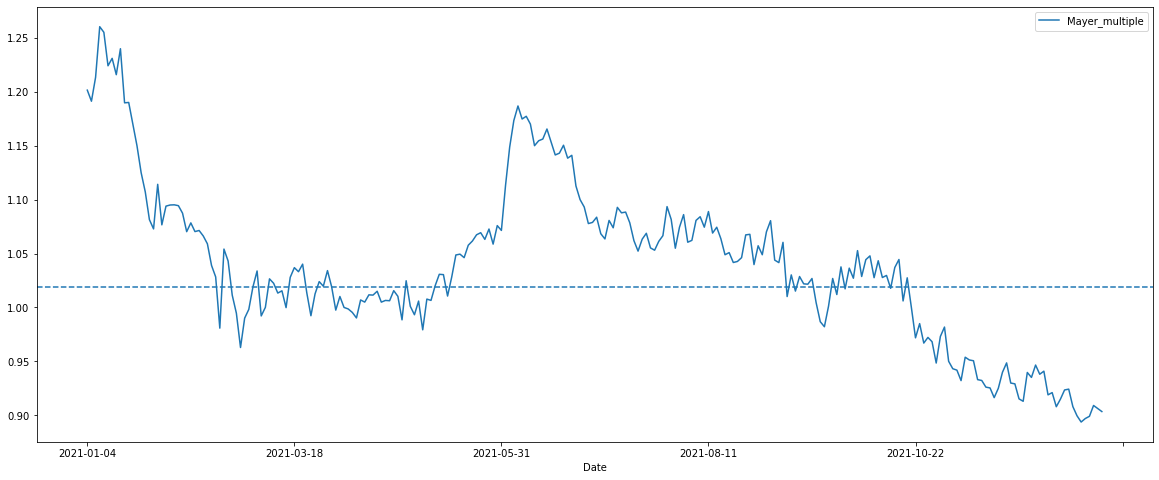

In [263]:
cutted_final_df = final_df[(final_df['Date'] > '2021-01-01')]

fig = cutted_final_df[['Date','Mayer_multiple']].set_index('Date').plot(figsize=(20,8))
fig.axhline(mayer_multiple_mean, ls='--')

The dashed line represents the average mayer multiple from the last past 200 days.

In theory, buying below mayer multiple should give you the best approach to upcoming gains in the future, however this is just another indicator that should improve your analysis on which stock to buy for example.